In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# Initial Setup

In [2]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/initial.csv')
sdf.params={'mass':0.001}
sdf

,x,y,vx,vy,u,h,rho
0,0.00000,0.00000,0,0,0.0,0.0625,1
1,0.03125,0.00000,0,0,0.0,0.0625,1
2,0.06250,0.00000,0,0,0.0,0.0625,1
3,0.09375,0.00000,0,0,0.0,0.0625,1
4,0.12500,0.00000,0,0,0.0,0.0625,1
...,...,...,...,...,...,...,...
1019,0.84375,0.96875,0,0,0.0,0.0625,1
1020,0.87500,0.96875,0,0,0.0,0.0625,1
1021,0.90625,0.96875,0,0,0.0,0.0625,1
1022,0.93750,0.96875,0,0,0.0,0.0625,1


<Axes: xlabel='x', ylabel='y'>

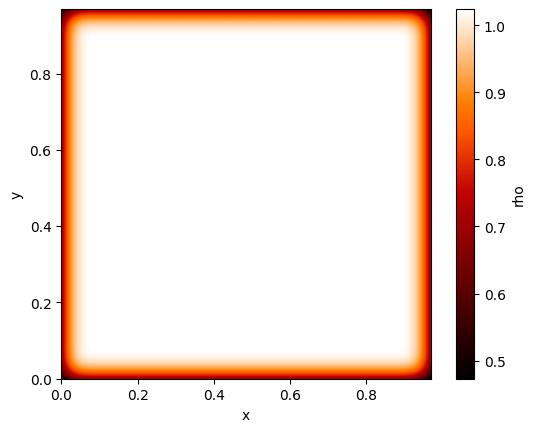

In [3]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [4]:
sdft = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdft.params={'mass':0.001}
sdft

,x,y,vx,vy,u,h,rho
0,1.00000,1.00000,-0.0,0.0,0.0,0.0625,0.999958
1,0.03125,1.00000,-0.0,0.0,0.0,0.0625,0.999958
2,0.06250,1.00000,-0.0,0.0,0.0,0.0625,0.999958
3,0.09375,1.00000,-0.0,0.0,0.0,0.0625,0.999958
4,0.12500,1.00000,-0.0,0.0,0.0,0.0625,0.999958
...,...,...,...,...,...,...,...
1019,0.84375,0.96875,0.0,0.0,0.0,0.0625,0.999958
1020,0.87500,0.96875,0.0,0.0,0.0,0.0625,0.999958
1021,0.90625,0.96875,0.0,0.0,0.0,0.0625,0.999958
1022,0.93750,0.96875,0.0,0.0,0.0,0.0625,0.999958


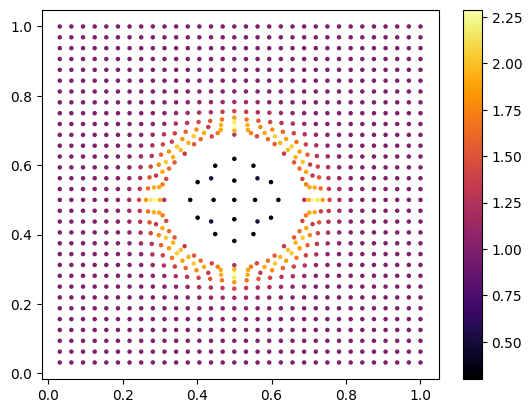

In [14]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 1273
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

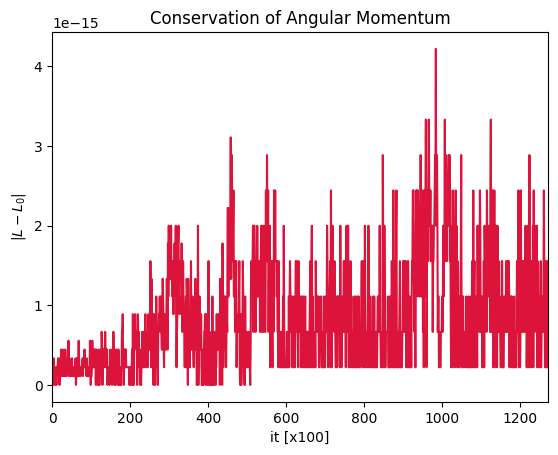

In [8]:
plt.plot(time[:-1], np.abs(ang_mom[:-1]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [9]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [10]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

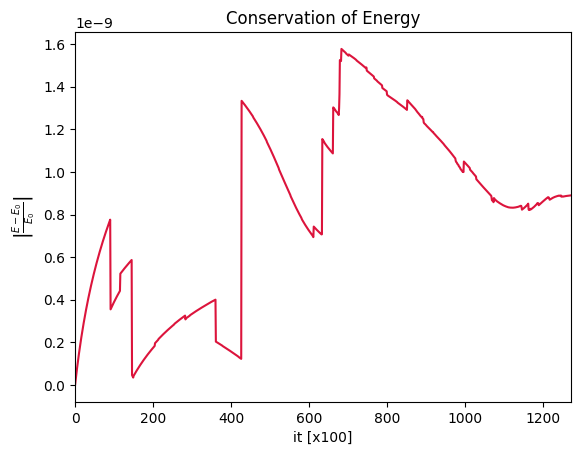

In [11]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [12]:
rad = []
rho = []
for ii in range(sdft.shape[0]):
    if ((sdft["x"][ii]>-0.44) and (sdft["x"][ii]<0.44)):
        if (sdft["y"][ii]>-0.44 and sdft["y"][ii]<0.44):
            rad.append(np.sqrt((sdft["x"][ii]-0.5)**2 + (sdft["y"][ii]-0.5)**2))
            rho.append(sdft["rho"][ii])
len(rad)

199

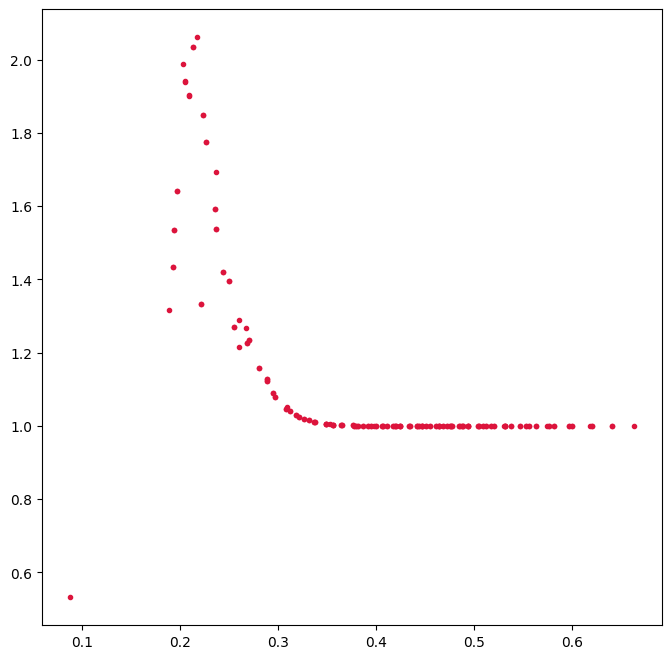

In [13]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, rho, ".", color="crimson")
#plt.ylim(0.95,1.02)
plt.show()